In [1]:
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install pandas --upgrade

  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: keras in c:\users\prerana\anaconda3\lib\site-packages (2.2.4)


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer




import tensorflow as tf


import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

C:\Users\Prerana\Anaconda3\envs\tf\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prerana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
 # DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

In [5]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 5
W2V_EPOCH = 3
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 3
BATCH_SIZE = 1024

In [6]:
# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [7]:
dataset_filename = os.listdir(".")[0]

In [8]:
dataset_path = os.path.join("..","training.1600000.processed.noemoticon.csv",dataset_filename)

In [9]:
print("Open file:", dataset_path)

Open file: ..\training.1600000.processed.noemoticon.csv\.ipynb_checkpoints


In [10]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [11]:
print("Dataset size:", len(df))

Dataset size: 1600000


In [12]:
df1=df[df["target"]==0]

In [13]:
df1

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [14]:
print("Dataset size:", len(df1))

Dataset size: 800000


In [15]:
df1 = df1.iloc[:400000, :]

In [16]:
df2=df[df["target"]==4]

In [17]:
df2 = df2.iloc[:400000,:]

In [18]:
print("Dataset size:", len(df2))

Dataset size: 400000


In [19]:
df=pd.concat([df1,df2])

In [20]:
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [22]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [23]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

Wall time: 569 ms


In [24]:
df.shape

(800000, 6)

Text(0.5,1,'Dataset labels distribuition')

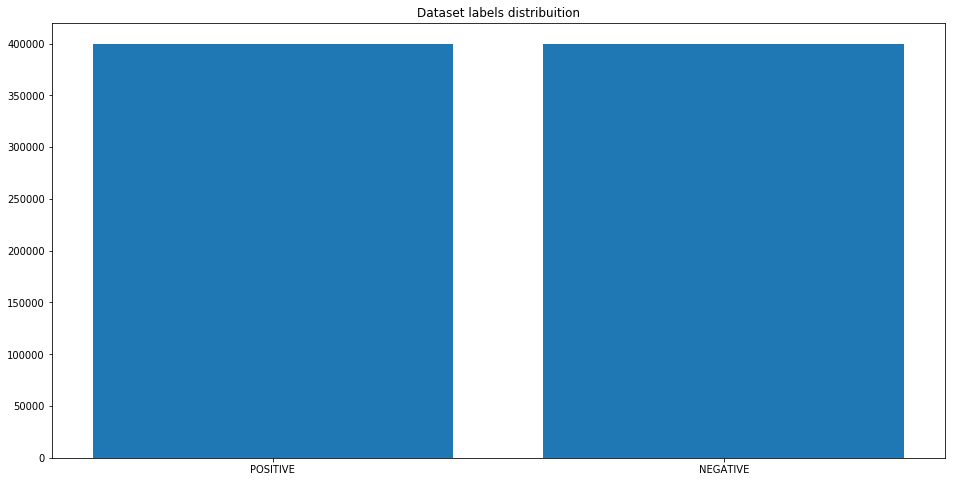

In [25]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [26]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [27]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [28]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

Wall time: 38.6 s


In [29]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 640000
TEST size: 160000


In [30]:
df_test[49:50]

,target,ids,date,flag,user,text
257371,NEGATIVE,1984948893,Sun May 31 16:07:35 PDT 2009,NO_QUERY,leighannirvine,yeah extra strength things mum takes leg chemi...


In [31]:
df_test[3:4]

,target,ids,date,flag,user,text
988988,POSITIVE,1834822366,Mon May 18 04:18:53 PDT 2009,NO_QUERY,tmntgirl,oh wow beautiful


In [32]:
%%time
documents = [_text.split() for _text in df_train.text] 

Wall time: 12.1 s


In [33]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [34]:
w2v_model.build_vocab(documents)

2019-02-07 09:58:15,082 : INFO : collecting all words and their counts
2019-02-07 09:58:15,133 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-02-07 09:58:15,406 : INFO : PROGRESS: at sentence #10000, processed 72237 words, keeping 13908 word types
2019-02-07 09:58:15,443 : INFO : PROGRESS: at sentence #20000, processed 144508 words, keeping 21227 word types
2019-02-07 09:58:15,495 : INFO : PROGRESS: at sentence #30000, processed 216440 words, keeping 27289 word types
2019-02-07 09:58:15,539 : INFO : PROGRESS: at sentence #40000, processed 288964 words, keeping 32656 word types
2019-02-07 09:58:15,573 : INFO : PROGRESS: at sentence #50000, processed 361290 words, keeping 37497 word types
2019-02-07 09:58:15,619 : INFO : PROGRESS: at sentence #60000, processed 433658 words, keeping 41970 word types
2019-02-07 09:58:15,674 : INFO : PROGRESS: at sentence #70000, processed 505225 words, keeping 46144 word types
2019-02-07 09:58:15,717 : INFO : PROGRESS: at s

In [35]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 20134


In [36]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2019-02-07 09:58:46,957 : INFO : training model with 8 workers on 20134 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-02-07 09:58:49,166 : INFO : EPOCH 1 - PROGRESS: at 4.76% examples, 178537 words/s, in_qsize 15, out_qsize 0
2019-02-07 09:58:50,276 : INFO : EPOCH 1 - PROGRESS: at 14.93% examples, 275924 words/s, in_qsize 16, out_qsize 0
2019-02-07 09:58:51,425 : INFO : EPOCH 1 - PROGRESS: at 24.01% examples, 291063 words/s, in_qsize 15, out_qsize 0
2019-02-07 09:58:52,448 : INFO : EPOCH 1 - PROGRESS: at 34.21% examples, 317223 words/s, in_qsize 16, out_qsize 1
2019-02-07 09:58:53,462 : INFO : EPOCH 1 - PROGRESS: at 42.42% examples, 319334 words/s, in_qsize 15, out_qsize 0
2019-02-07 09:58:54,466 : INFO : EPOCH 1 - PROGRESS: at 50.45% examples, 319896 words/s, in_qsize 15, out_qsize 0
2019-02-07 09:58:55,504 : INFO : EPOCH 1 - PROGRESS: at 57.58% examples, 314067 words/s, in_qsize 13, out_qsize 4
2019-02-07 09:58:56,522 : INFO : EPOCH 1 - PROGRESS: 

Wall time: 38.7 s


(12127389, 13842897)

In [37]:
w2v_model.most_similar("happy")

C:\Users\Prerana\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-02-07 09:59:38,434 : INFO : precomputing L2-norms of word weight vectors
C:\Users\Prerana\Anaconda3\envs\tf\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('celebrating', 0.6767642498016357),
 ('present', 0.6604880094528198),
 ('celebrations', 0.6064820289611816),
 ('60th', 0.594109058380127),
 ('gift', 0.5682622194290161),
 ('celebrate', 0.5588886737823486),
 ('celebration', 0.5477669835090637),
 ('proud', 0.5466712713241577),
 ('18th', 0.5329441428184509),
 ('moms', 0.5311873555183411)]

In [38]:
from tensorflow.keras import preprocessing


In [39]:
 from tensorflow.keras.layers import Embedding

In [40]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 183096
Wall time: 18.8 s


In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)